# 군집 알고리즘

픽셀값을 이용해서 이미지 상의 비슷한 과일끼리 모으는 방법

## 과일 사진 데이터 준비하기

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-17 16:52:17--  https://bit.ly/fruits_300_data
bit.ly (bit.ly) 해석 중... 67.199.248.10, 67.199.248.11
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.10|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [따라감]
--2022-05-17 16:52:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
github.com (github.com) 해석 중... 15.164.81.167
다음으로 연결 중: github.com (github.com)|15.164.81.167|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [따라감]
--2022-05-17 16:52:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3000128 (2.9M) [application/oct

In [3]:
import numpy as np
import matplotlib.pyplot as plt

넘파이에서 npy파일을 불러올 때에는 load 메서드를 사용합니다.

In [4]:
fruits = np.load('fruits_300.npy')

배열의 크기를 알아보겠습니다.

In [5]:
print(fruits.shape)

(300, 100, 100)


배열은 순서대로 샘플의 갯수, 이미지 높이, 이미지 너비를 각각 나타냅니다.  
첫번째 이미지의 첫번째 행을 출력해보겠습니다.

In [6]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫번째 행에 들어있는 픽셀 100개의 값이 출력되었습니다.  
이 넘파이는 흑백사진을 담고있기 때문에 0부터 255 사이의 값을 지닙니다.  
<br/>
matplotlib의 imshow() 함수를 사용하면 넘파이 배열로 저장되어있는 이미지를 쉽게 그릴 수 있습니다.  
흑백 이미지이기 때문에 cmap='gray'로 지정해줍니다.

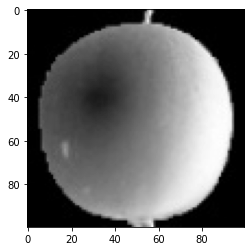

In [7]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

0에 가까울수록 검게 나타나고 높은 값을 밝게 표시되는 이미지 입니다.  
픽셀값이 높으면 컴퓨터가 의미를 부여하기 쉽기 때문에 색이 반전되어 저장된 것을 볼 수 있습니다.  
cmap 값에 gray_r을 지정해주면 우리가 보기 쉽게 색을 반전시킬 수 있습니다.

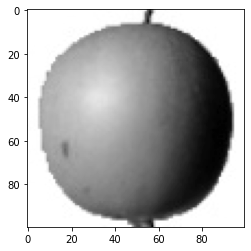

In [8]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이 되도록 이미지가 출력되었습니다.  
이번엔 바나나와 파인애플 이미지를 출력해봅니다.

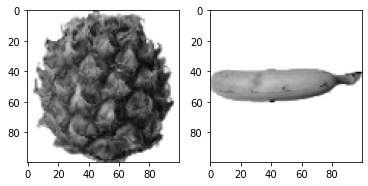

In [9]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

matplotlib의 subplot() 함수를 사용하여 여러개의 그래프를 배열처럼 동시에 나타낼 수 있도록 하였습니다.  
axs에는 파인애플 이미지와 바나나 이미지를 차례로 담겨있습니다.  
이제 각 과일사진의 평균을 내서 차이를 확인해보도록 하겠습니다.

## 픽셀 값 분석하기

가로 세로 100씩의 이미지를 펼쳐 길이가 10000인 배열로 만듭니다.  
fruits 배열에서 순서대로 100개씩 선택했습니다.  
reshape() 메서드를 사용하여 두 번째 차원과 세 번째 차원을 합했습니다.  
첫번째 차원을 -1로 지정했을 때 남은 차원을 할당하게 됩니다.  
여기서 첫번째 차원은 샘플의 갯수를 나타냅니다.

In [10]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [11]:
print(apple.shape)

(100, 10000)


apple, pineapple, banana의 배열의 크기가 100, 10000으로 변경되었습니다.

이제 픽셀의 평균값을 계산합니다. axis 값을 0으로 지정하면 행을 따라 계산하고, 1로 지정하면 열을 따라 계산합니다.  
샘플을 가로로 나열했기 때문에 axis 값을 1로 지정하고 평균을 계산합니다.

In [12]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


눈으로 쉽게 확인하기 위해 사과, 파인애플, 바나나 각각을 히스토그램으로 그려보겠습니다.

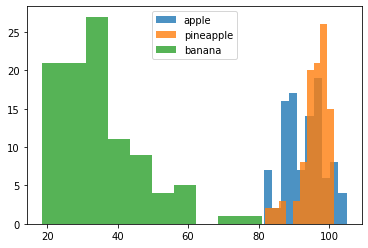

In [13]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

바나나는 픽셀 평균값 만으로도 사과와 파인애플과는 구분됩니다.  
그렇다면 사과와 파인애플을 구분하기 위해 각 픽셀의 평균값을 계산해보겠습니다.  
axis=0으로 지정하여 픽셀 10000개의 평균값을 막대 그래프로 그려봅니다.

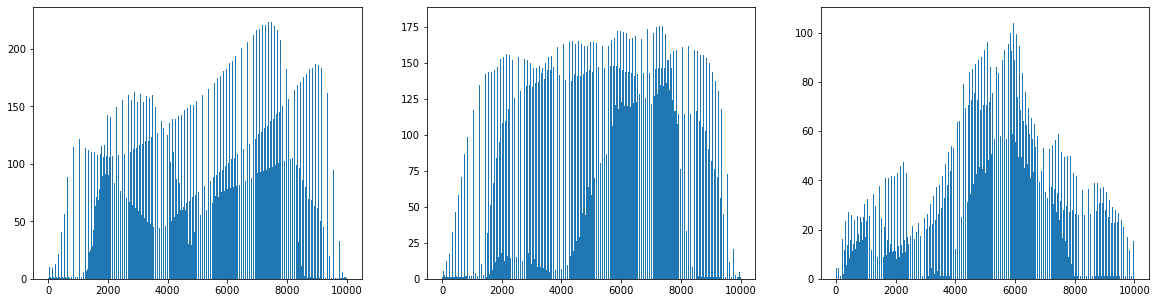

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

세 과일의 픽셀 평균값이 제각각 다른 것을 볼 수 있습니다.  
이제 픽셀 평균값을 100 * 100으로 바꿔 이미지처럼 출력해봅니다.  

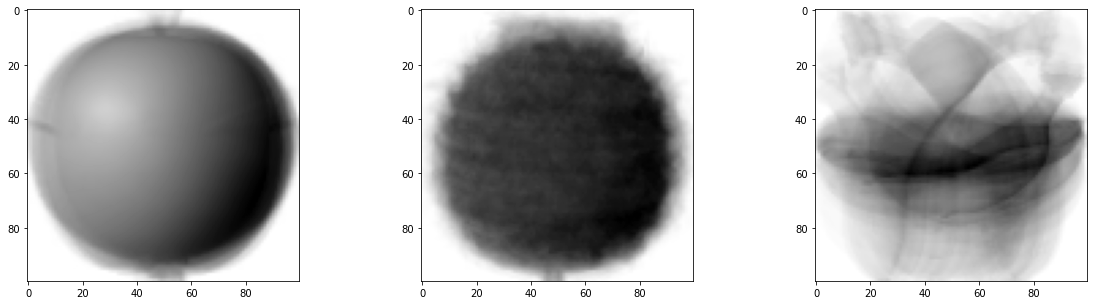

In [15]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

평균에 가까운 사진을 고르기 위해 fruit 배열의 샘플에서 apple_mean을 뺀 후 절댓값을 취하여 평균을 냅니다.  
각 샘플에 대한 평균을 지정하기 위해 axis에 1, 2를 모두 지정합니다.  

In [16]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


오차값이 가장 적은 순서 대로 100개를 골라봅니다.  
np.argsort()는 작은것부터 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환합니다.  
처음 100개의 그래프를 그려보겠습니다.

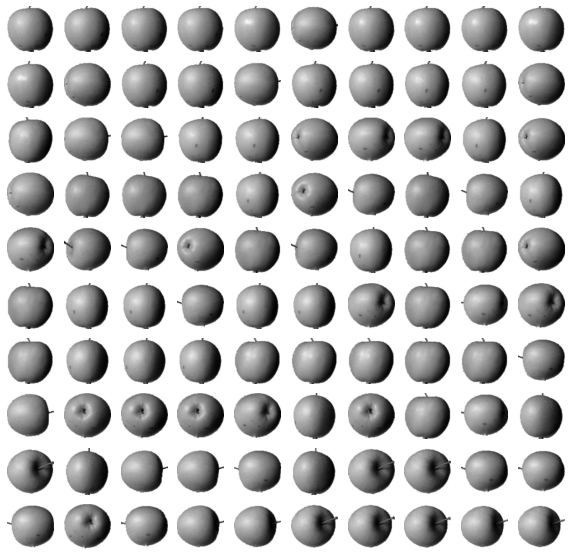

In [17]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()